# The Sparks Foundation - Data Science & Business Analytics Internship

### Data Science and Business Analytics Internship

## Author : Ankit Yadav

### TASK 1: Prediction Using Supervised Machine Learning

### Problem Statement: Predict the percentage of a student based on the number of hours studied



### Importing Libraries

In [7]:
#library used for data manipulation and analysis
import pandas as pd
# library used for working with arrays.
import numpy as np
# library for plots and visualisations
import matplotlib.pyplot as plt
# library for visualisations
import seaborn as sns
%matplotlib inline 
# to restrict the float value to 2 decimal places
import warnings
warnings.filterwarnings("ignore")

### Loading Dataset

In [8]:
# Loading data from source

data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

### Attribute Information

* Hours - Number of Hours student studied
* Scores - student score in exam

In [9]:
# Top 5 rows

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
# Last 5 rows

data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


 ### Shape Of Data

In [11]:
data.shape

(25, 2)

*  We have 25 rows and 2 columns in the dataset
* where Scores is the Target column(Regression Problem)

In [12]:
# Checking about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


* Dtype of Hours column is float and Scores is int

In [13]:
# Checkign for null values in each column

data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no missing values in the Dataset

In [15]:
# Checking for the duplicate rows

value=len(data[data.duplicated()])
print(value)

0


There are no duplicate rows in the dataset

In [16]:
# Data Description

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


### EDA(Exploratory Data Analysis)

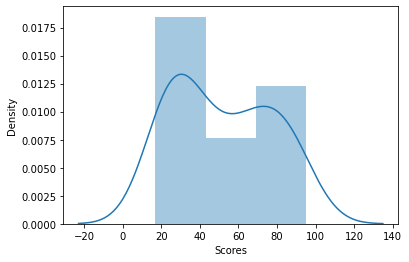

In [18]:
# Plotting the Dataset

sns.distplot(data["Scores"])
plt.show()

* It is almost the Normal distribution ,so it satisfy the assumption Of Linear Regression

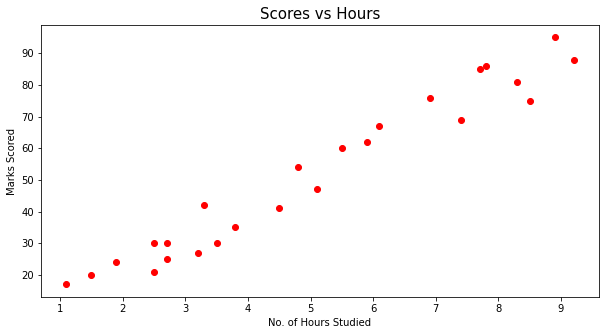

In [21]:
# Plotting the distribution of score
plt.figure(figsize=(10,5))
plt.title('Scores vs Hours', size=15)
plt.xlabel('No. of Hours Studied', size=10)
plt.ylabel('Marks Scored', size=10)
plt.scatter(data.Hours,data.Scores,color='red')
plt.show()

* By looking at the scatter plot we can say that there is linear relationship between the Scores and Number of Hours studied , It shows a positive relation between the two variables , with increase in the Study hours there is increase in the Marks scored  

### Correlation Matrix

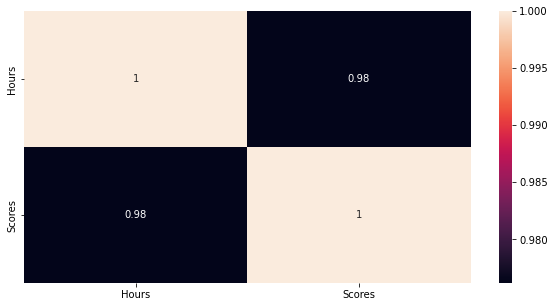

In [23]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr() , annot=True)
plt.show()

* As discussed there is very strong relatiosnhip between the Two variables.

### Dividing the Data

In [26]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [29]:
# Verifying Data

X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [30]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Splitting Dataset Into Train and Test

In [32]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

### Implementing Linear regression

In [33]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(x_train, y_train)

In [34]:
#checking the score
reg.score(x_train, y_train)

0.9563209860190123

In [35]:
#checking the coefficeint
reg.coef_

array([9.58466744])

In [36]:
# Checking intercept

reg.intercept_

2.444074453551927

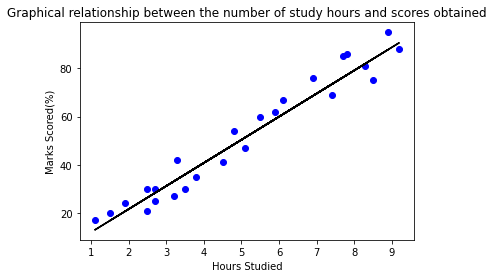

In [39]:
#Plotting the regression line
line=reg.coef_*X+reg.intercept_

#Plotting the scatter plot with the regression line
plt.scatter(X,y,color='blue',marker='o')
plt.plot(X,line,color='black');
plt.title('Graphical relationship between the number of study hours and scores obtained')
plt.xlabel('Hours Studied')
plt.ylabel('Marks Scored(%)')
plt.show()

In [41]:
#getting the X_train and X-test value
y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

### Comparing Actual and Predicted Results

In [46]:
data=pd.DataFrame({'Actual': y_test,'Predicted':y_pred_test})
data

,Actual,Predicted
0,67,60.910546
1,24,20.654943
2,41,45.575078
3,76,68.578280
4,95,87.747615
5,30,26.405743
6,42,34.073477
7,27,33.115010


In [44]:
#importing package
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#calculating MSE
MSE= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score

#calculate r2 and adjusted r2
r2= r2_score((y_test), (y_pred_test))
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score((y_test), (y_pred_test)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2)

MSE : 36.2528781029398
RMSE : 6.021036298091866
MAE : 5.789935669612371
R2 : 0.9388072529120122
Adjusted R2 : 0.9286084617306809


* The r2_score for the test set is 0.94, it means that our linear model is performing well on the data.

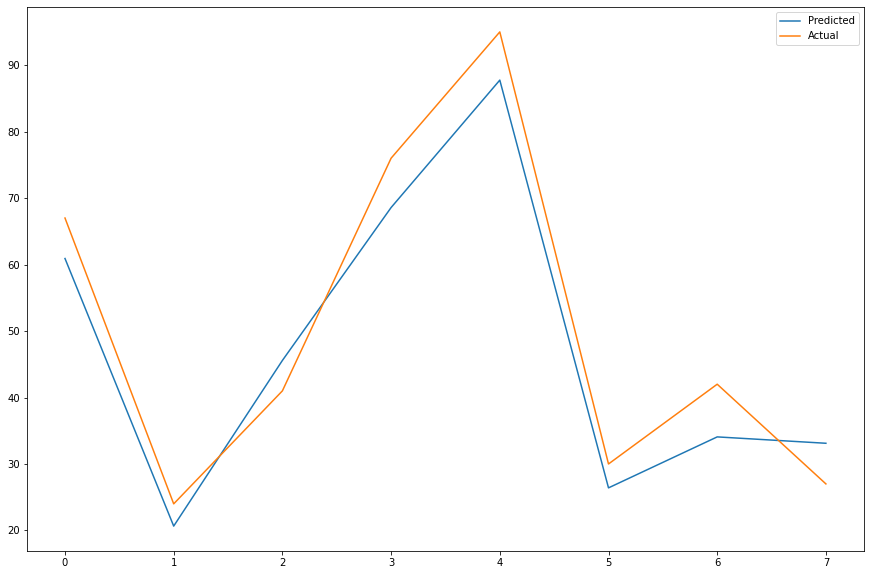

In [47]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [50]:
hours=9.25
test=np.array([hours])
test=test.reshape(-1,1)
own_pred=reg.predict(test)
print("No. of hours={}".format(hours))
print("Predicted Score={}".format(own_pred[0]))

No. of hours=9.25
Predicted Score=91.10224822831282


* Therefore, from the above results it can be concluded that the predicted score of a person studying for 9.25 hours is 91.102